# Для начала импортируем все библиотеки

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
# one-hot encoding
from tensorflow.keras.utils import to_categorical
# use ImageDataGenerator for image augmentations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
#чтобы при каждом запуске был одинаковый результат используем рандом сид
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Загружаем датасет и делим его на train и test

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


# Теперь познакомимся с нашими данными ближе

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


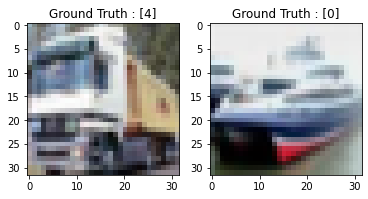

In [8]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=(6,5))
plt.subplot(121)
plt.imshow(train_images[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[10]))
plt.subplot(122)
plt.imshow(test_images[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[10]))
plt.show()

# Сделаем предобработку наших данных

In [9]:
# найдем размер входных изображений
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# сменим тип данных
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# сделаем нормальное распределение данных
train_data /= 255
test_data /= 255

# поменяем лейблы с integer на categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
# покажем изменения
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Создадим собственную нейронную сеть

In [10]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

# Инециализируем и выведем описание архитектуры модели

In [13]:
model1 = createModel()
batch_size = 256
epochs = 10

# Установим конфигурацию для обучения: optimizer, loss function, accuracy metrics
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#посмотрим описание архитектуры нашей модели
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [14]:
history = model1.fit(train_data,
                     train_labels_one_hot,
                     batch_size=batch_size, 
                     epochs=epochs, verbose=1, 
                     validation_data=(test_data, test_labels_one_hot)
          )

model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/10
196/196 [==============================] - 233s 1s/step - loss: 2.0627 - accuracy: 0.2391 - val_loss: 1.7132 - val_accuracy: 0.3748
Epoch 2/10
196/196 [==============================] - 231s 1s/step - loss: 1.7170 - accuracy: 0.3750 - val_loss: 1.5281 - val_accuracy: 0.4365
Epoch 3/10
196/196 [==============================] - 228s 1s/step - loss: 1.5061 - accuracy: 0.4571 - val_loss: 1.4738 - val_accuracy: 0.4860
Epoch 4/10
196/196 [==============================] - 228s 1s/step - loss: 1.3617 - accuracy: 0.5154 - val_loss: 1.2478 - val_accuracy: 0.5507
Epoch 5/10
196/196 [==============================] - 228s 1s/step - loss: 1.2606 - accuracy: 0.5540 - val_loss: 1.2721 - val_accuracy: 0.5308
Epoch 6/10
196/196 [==============================] - 230s 1s/step - loss: 1.1715 - accuracy: 0.5849 - val_loss: 1.0972 - val_accuracy: 0.6037
Epoch 7/10
196/196 [==============================] - 228s 1s/step - loss: 1.1039 - accuracy: 0.6105 - val_loss: 0.9992 - val_accuracy: 0.6424

[0.8621136546134949, 0.7013000249862671]

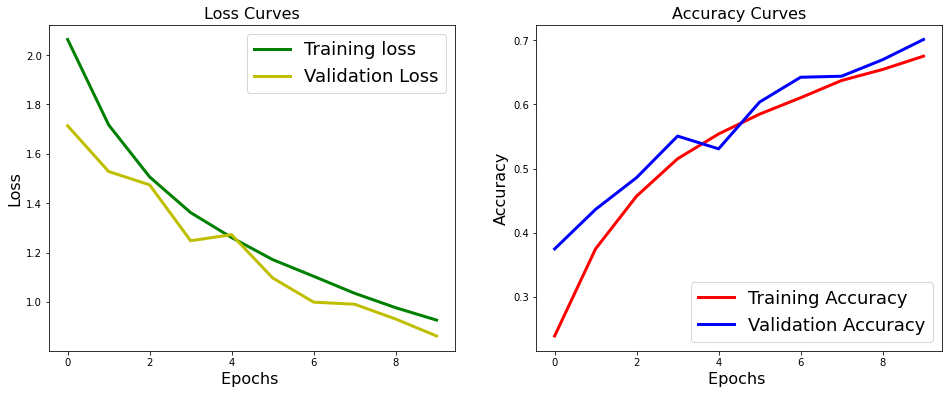

In [15]:
plt.figure(figsize=[16,6])
plt.subplot(121)
plt.plot(history.history['loss'],'g',linewidth=3.0)
plt.plot(history.history['val_loss'],'y',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.subplot(122)
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

# Выведем матрицу ошибок

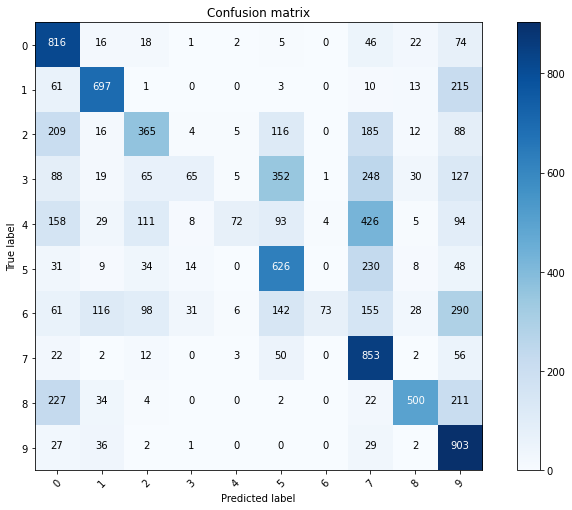

In [21]:
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model1.predict(test_images).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Посмотрим на Метрики качества: Precision, Recall, F1-measure,

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, p_test))

              precision    recall  f1-score   support

           0       0.48      0.82      0.60      1000
           1       0.72      0.70      0.71      1000
           2       0.51      0.36      0.43      1000
           3       0.52      0.07      0.12      1000
           4       0.77      0.07      0.13      1000
           5       0.45      0.63      0.52      1000
           6       0.94      0.07      0.14      1000
           7       0.39      0.85      0.53      1000
           8       0.80      0.50      0.62      1000
           9       0.43      0.90      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.60      0.50      0.44     10000
weighted avg       0.60      0.50      0.44     10000



Чтобы получить наилучший резултат нужно запустить обучение модели на 50-70 эпох, в таком случае мы получим точность(ассuracy)  около 90 %

# Перейдем к CIFAR - 100

In [33]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

--2020-12-12 23:01:14--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  17.3MB/s    in 11s     

2020-12-12 23:01:25 (15.2 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]



In [34]:
!tar -xf cifar-100-python.tar.gz

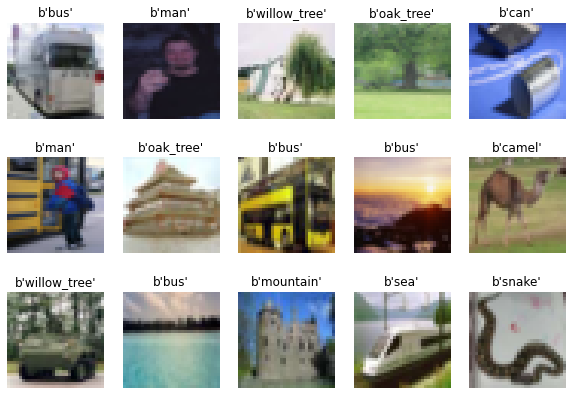

In [38]:
import pandas as pd
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict
meta = unpickle('./cifar-100-python/meta')
train = unpickle('./cifar-100-python/train')
test = unpickle('./cifar-100-python/test')

Classes = pd.DataFrame(meta[b'fine_label_names'],columns = ['Classes'])
X = train[b"data"]

X = X.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

num_images_row = 3
num_images_column = 5
img_nums = np.random.randint(0,len(X),num_images_row*num_images_column)

f, axarr = plt.subplots(num_images_row,num_images_column)

for i in range(0,num_images_row):
    for j in range(0,num_images_column):
        axarr[i,j].imshow(X[img_nums[(i*num_images_column)+j]])
        axarr[i,j].set_title(str(Classes.iloc[train[b'fine_labels'][img_nums[(i+1)*(j+1)-1]]]).split()[1])
        axarr[i,j].axis('off')